In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
# !pip install mnist

## Датасет
### В качестве датасета была взята уменьешенная копия MNIST с меньшим колличеством семплов и размерности

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits['data']
target = digits['target']

In [4]:
data.shape

(1797, 64)

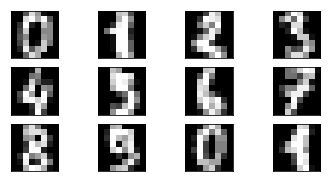

In [5]:
def display_digits(digits):
    N = len(digits)
    for i, digit in enumerate(digits):
        plt.subplot((N//4)+1, 4, i+1)
        pixels = digit.reshape((8,8))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()
    return 

display_digits(data[:12])

### Нормализация данных по яркости 

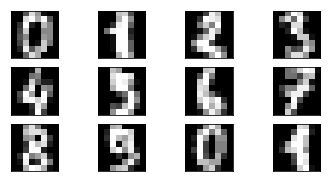

In [6]:
from sklearn.preprocessing import normalize
data = normalize(data, norm='max', axis=1)

display_digits(data[:12])

### В качестве предварительной обработки используем уменьшение  размерности с помошью PCA, исходя из логики что в картинках встречается очень много скореллированных фич 

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = PCA(16).fit_transform(data)

### Изобразим две первых главных компонент на проскости

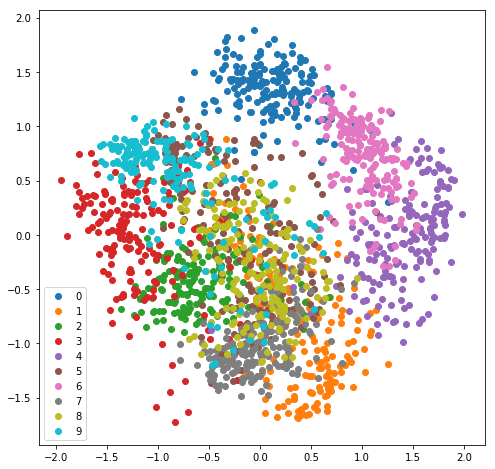

In [8]:
def plot_digits(X, y):
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.scatter(X[y==i][:,0], X[y==i][:,1])
        
    plt.legend(range(10))
    plt.show()
    
plot_digits(X, target)

### Зададим метрики и перебор по соседям

In [9]:
metrics = ['manhattan', 
           'euclidean', 
           'chebyshev']

neighbors = [1,3,5,10,20,30]

### Создадим метод для подбора пораметров с помощью LOO и метод для оценки модели с помощью скользящего контроля 

In [10]:
from sklearn.model_selection import cross_val_score, GridSearchCV, LeaveOneOut

def evaluate_model(clf):
    return cross_val_score(clf, X, target, cv=5, scoring='accuracy').mean()


def grid_search_model(clf, param_grid):
    gs = GridSearchCV(estimator=clf,
                      cv=LeaveOneOut(), 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      verbose=1, n_jobs=-1)
    gs.fit(X, target)
    return gs


def experiment(clf, param_grid):
    gs = grid_search_model(clf, param_grid)
    score = evaluate_model(gs.best_estimator_)
    
    print('Best model by LOO is:', gs.best_estimator_)
    print('Best model params by LOO are:', gs.best_params_)
    print('Best model score on CV(5) is:', score)

### 1. Narest Neighbour method

In [11]:
from sklearn.neighbors import KNeighborsClassifier, KernelDensity, RadiusNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=1)
param_grid = {'metric': metrics}
experiment(nn, param_grid)

Fitting 1797 folds for each of 3 candidates, totalling 5391 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:    2.1s


Best model by LOO is: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Best model params by LOO are: {'metric': 'euclidean'}
Best model score on CV(5) is: 0.9555873489383526


[Parallel(n_jobs=-1)]: Done 5391 out of 5391 | elapsed:    4.3s finished


### 2. k-NN method

In [12]:
knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {'metric': metrics, 'n_neighbors': neighbors}
experiment(knn, param_grid)

Fitting 1797 folds for each of 18 candidates, totalling 32346 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 12768 tasks      | elapsed:  4

Best model by LOO is: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
Best model params by LOO are: {'metric': 'euclidean', 'n_neighbors': 5}
Best model score on CV(5) is: 0.9589470055133636


### 3. Weighted k-NN method

In [13]:
knn_weighted = KNeighborsClassifier(weights='distance',n_jobs=-1)
param_grid = {'metric': metrics, 'n_neighbors': neighbors}
experiment(knn_weighted, param_grid)

Fitting 1797 folds for each of 18 candidates, totalling 32346 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 12768 tasks      | elapsed:  4

Best model by LOO is: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')
Best model params by LOO are: {'metric': 'euclidean', 'n_neighbors': 5}
Best model score on CV(5) is: 0.9583836252316736


### 4. Fixed parzen window 

In [18]:
knn_weighted = RadiusNeighborsClassifier(n_jobs=-1)
param_grid = {'metric': metrics, 'radius': [7, 7.5,8,9,10]}
experiment(knn_weighted, param_grid)

Fitting 1797 folds for each of 15 candidates, totalling 26955 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 12768 tasks      | elapsed:  8

Best model by LOO is: RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
             metric_params=None, outlier_label=None, p=2, radius=7,
             weights='uniform')
Best model params by LOO are: {'radius': 7, 'metric': 'manhattan'}
Best model score on CV(5) is: 0.8601322619311172


### 5. Non-fixed parzen window 

In [17]:
def weights(distances):
    return 1.0 - distances/(distances.max() + 0.0000000001)

non_fixed_parzen_window = KNeighborsClassifier(weights=weights,n_jobs=-1)
param_grid = {'metric': metrics,'n_neighbors': neighbors}
experiment(non_fixed_parzen_window, param_grid)

Fitting 1797 folds for each of 18 candidates, totalling 32346 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 12768 tasks      | elapsed:  4

Best model by LOO is: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights=<function weights at 0x7fc621f9af28>)
Best model params by LOO are: {'metric': 'manhattan', 'n_neighbors': 10}
Best model score on CV(5) is: 0.9516821717961242


### Полученные результаты

In [21]:
algorithms = ['NN', 'kNN', 'Weighted kNN', 'Fixed parzen window', 'Parzen window']
best_params = [{'metric': 'euclidean'},
               {'metric': 'euclidean', 'n_neighbors': 5},
               {'metric': 'euclidean', 'n_neighbors': 5},
              {'radius': 7, 'metric': 'manhattan'},
              {'metric': 'manhattan', 'n_neighbors': 10}]
scores = [0.9555873489383526,
          0.9589470055133636, 
          0.9583836252316736,
          0.8601322619311172,
          0.9516821717961242]
pd.DataFrame(dict(algorithm=algorithms, best_params=best_params, score=scores))

,algorithm,best_params,score
0,NN,{'metric': 'euclidean'},0.955587
1,kNN,"{'metric': 'euclidean', 'n_neighbors': 5}",0.958947
2,Weighted kNN,"{'metric': 'euclidean', 'n_neighbors': 5}",0.958384
3,Fixed parzen window,"{'radius': 7, 'metric': 'manhattan'}",0.860132
4,Parzen window,"{'metric': 'manhattan', 'n_neighbors': 10}",0.951682
